In [14]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:,.2f}'.format

## use the data from the [file](https://drive.google.com/file/d/1B6M7Ku89ViIStXvWU6j7PyDnCTb0McEI/view?usp=sharing), read it to a dataframe and make any modification that you may find useful to solve the task

In [15]:

df = pd.read_csv('../../datasets/ab-test.csv')
df.head(5)

,uid,diff,time,group
0,user_1,-103.33,after,test
1,user_1,-6.00,before,test
2,user_18,-10.00,after,test
3,user_18,-3.50,before,test
4,user_19,-82.33,after,test


In [16]:
res = df.pivot(index=['uid','group'], columns='time', values='diff').reset_index().drop('uid', axis=1)
res.head(5)

time,group,after,before
0,test,-103.33,-6.00
1,control,-75.00,-103.00
2,control,-81.50,-15.50
3,control,-32.00,-3.00
4,control,17.50,-153.00


## box plot
* the figsize is still the same, you can choose whatever fontsize you like
* the color palette should be the same as in the example
* the fontsize of the title is 15
* the width of the box lines is 3, the width of the median lines is 2

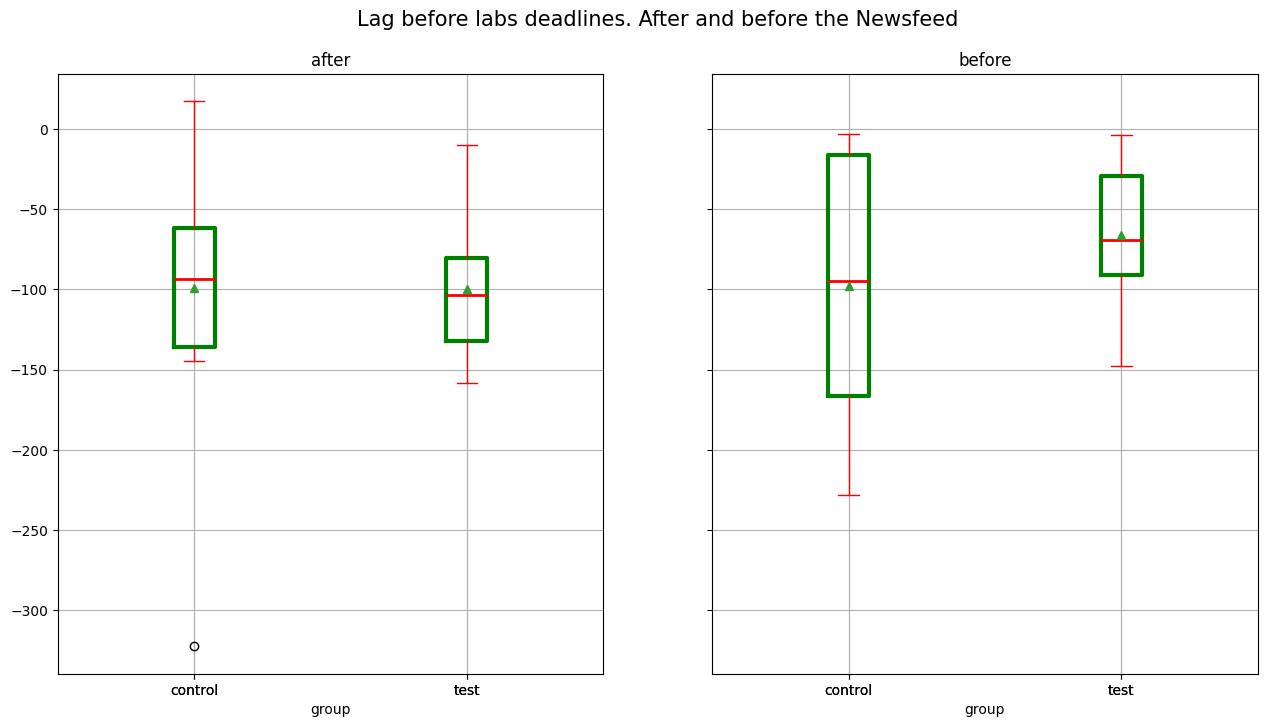

In [17]:
box_props = {
	'showmeans': True,
	'boxprops': {
		'color': 'green',
		'linewidth': 3
	},
	'medianprops': {
		'color': 'red',
		'linewidth': 2
	},
	'whiskerprops': {
		'color': 'red',
	},
	'capprops': {
		'color': 'red',
	}
}

res.boxplot(column=['after', 'before'], by='group', grid=True, **box_props, figsize=(15,8))
plt.suptitle('Lag before labs deadlines. After and before the Newsfeed', fontsize=15)
plt.show()

## What was the IQR of the control group before the newsfeed?

IQR ~ 190